In [ ]:
pip install matplotlib tensorflow

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
x_train = np.loadtxt('input.csv',delimiter=',')
y_train = np.loadtxt('labels.csv',delimiter=',')

x_test = np.loadtxt('input_test.csv',delimiter=',')
y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [5]:
x_train = x_train.reshape(len(x_train),100, 100, 3)
Y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

datagen= ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [6]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of x_test:",x_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 100, 100, 3)
shape of x_test: (400, 100, 100, 3)
shape of x_test: (400, 100, 100, 3)


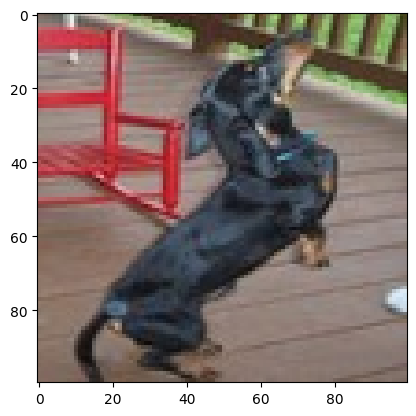

In [7]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(100, 100, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
pip install scipy

In [12]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.5240 - loss: 0.6951 - val_accuracy: 0.5675 - val_loss: 0.6797
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.5545 - loss: 0.6846 - val_accuracy: 0.5100 - val_loss: 0.6808
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.5600 - loss: 0.6774 - val_accuracy: 0.6175 - val_loss: 0.6354
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.5845 - loss: 0.6741 - val_accuracy: 0.6200 - val_loss: 0.6515
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.5970 - loss: 0.6615 - val_accuracy: 0.6125 - val_loss: 0.6581
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.6105 - loss: 0.6585 - val_accuracy: 0.6825 - val_loss: 0.6419
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.5960 - loss: 0.6596 - val_accuracy: 0.5975 - val_loss: 0.6494
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.6200 - loss: 0.6505 - val_accu

In [13]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6500 - loss: 0.6237


[0.6237262487411499, 0.6499999761581421]

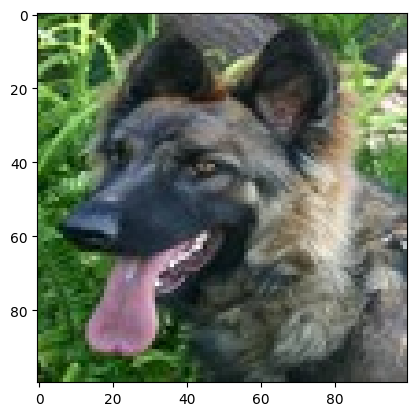

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Our model says it is a : dog


In [14]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [15]:
model.save('model.h5')
print('Saved model to model.h5')

Saved model to model.h5
